In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [176]:
path = '../../data/clean/s2_data.csv'
df = pd.read_csv(path)

category_cols = ['dose', 'screen_sex', 'project', 'week', 'menthol_status', 'strength', 'site']
df[category_cols] = df[category_cols].astype('category')

In [177]:
df

,screen_id,screen_age,screen_sex,project,week,dose,menthol_status,baseline_cpd,experimental_cpd,adherence,usual_brand,strength,carmine,carmine_nicotine,site
0,J-A001,29,Female,project 1,week0,2.4,Non-Menthol,16.142857,0.000000,NaN,Reservation Rollies Regular,regular,NaN,NaN,uvm
1,J-A001,29,Female,project 1,week01,2.4,Non-Menthol,16.142857,20.142857,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
2,J-A001,29,Female,project 1,week02,2.4,Non-Menthol,16.142857,17.857143,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
3,J-A001,29,Female,project 1,week03,2.4,Non-Menthol,16.142857,13.666667,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
4,J-A001,29,Female,project 1,week04,2.4,Non-Menthol,16.142857,18.333333,1.0,Reservation Rollies Regular,regular,NaN,NaN,uvm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9052,J-C165,34,Female,project 1,week08,2.4,Menthol,19.285714,20.833333,1.0,NaN,NaN,NaN,NaN,jhu
9053,J-C165,34,Female,project 1,week09,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu
9054,J-C165,34,Female,project 1,week10,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu
9055,J-C165,34,Female,project 1,week11,2.4,Menthol,19.285714,20.000000,1.0,NaN,NaN,NaN,NaN,jhu


Pick an arbitrary row to show in presentation

In [178]:
df.iloc[[120]].transpose()

,120
screen_id,J-A016
screen_age,38
screen_sex,Female
project,project 1
week,week02
dose,0.4
menthol_status,Non-Menthol
baseline_cpd,29.0
experimental_cpd,20.428571
adherence,0.895105


Continuous

In [179]:
df.describe()

,screen_age,baseline_cpd,experimental_cpd,adherence,carmine_nicotine
count,9057.000000,9057.000000,9057.000000,8162.000000,7437.000000
mean,36.065805,19.786914,19.069471,0.894110,17.597916
std,11.108000,10.613120,15.064543,0.200769,2.091094
min,18.000000,0.000000,0.000000,0.000000,13.200000
25%,27.000000,11.666667,8.142857,0.889772,16.100000
50%,34.000000,18.571429,17.000000,0.993311,17.300000
75%,43.000000,24.714286,26.142857,1.000000,18.900000
max,68.000000,71.285714,113.142857,1.000000,29.300000


Now, this is longitudinal data that I cleaned in various different ways. Baseline characteristics like sex at birth, age at screening, baseline cigarettes per day, study population (project), study site, experimental dose, menthol status, and usual brand preference are all __permenant__ throughout the trial. I _completed_ the data frame with these values throughout each subject's experimental week entry (`week1` through `week12`) with the values in that subject's `week0` entry. 

Categorical

In [180]:
desc = df[df['week'] == 'week0'].describe(include=['category'])
# desc.to_clipboard()
desc

,screen_sex,project,week,dose,menthol_status,strength,site
count,775,775,775,775.0,775,767,775
unique,2,3,1,3.0,2,4,3
top,Female,project 2,week0,0.4,Non-Menthol,regular,uvm
freq,551,260,775,286.0,424,616,509


In [181]:
df[df['week'] == 'week0'].groupby('site').count()

,screen_id,screen_age,screen_sex,project,week,dose,menthol_status,baseline_cpd,experimental_cpd,adherence,usual_brand,strength,carmine,carmine_nicotine
site,,,,,,,,,,,,,,
brown,94,94,94,94,94,94,94,94,94,0,94,92,81,81
jhu,172,172,172,172,172,172,172,172,172,0,171,170,165,165
uvm,509,509,509,509,509,509,509,509,509,0,509,505,394,394


## Outcome variables of interest
### Cigarettes Per Day (CPD)

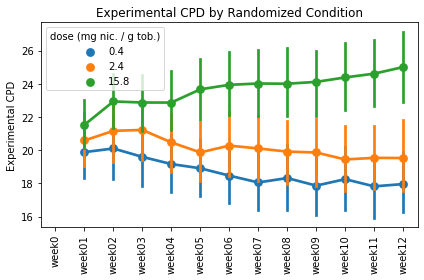

In [182]:
def make_pointplot(df, yvar, ylabel, color_var, legend_title, title, filename):

    fname = "../../figures/" + filename

    sns.pointplot(
        x = 'week',
        y = yvar,
        hue = color_var,
        data = df[df['week'] != 'week0']
        
    )
    plt.xticks(rotation = 90)
    plt.xlabel(None)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title = legend_title)
    plt.tight_layout()

    plt.savefig(fname, dpi = 200)
    plt.show()

make_pointplot(
    df, 
    yvar = 'experimental_cpd', 
    ylabel = 'Experimental CPD',
    color_var = 'dose',
    legend_title = 'dose (mg nic. / g tob.)',
    title = 'Experimental CPD by Randomized Condition',
    filename = 'cpd_by_week.png'
    )   

### Adherence

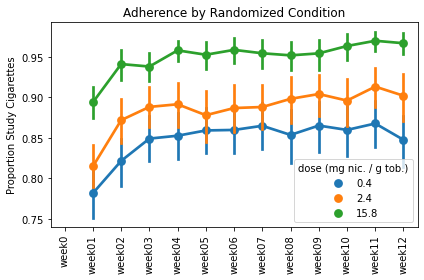

In [183]:
make_pointplot(
    df,
    yvar = 'adherence',
    ylabel = "Proportion Study Cigarettes",
    color_var = 'dose',
    legend_title = 'dose (mg nic. / g tob.)',
    title = 'Adherence by Randomized Condition',
    filename = 'adherence_by_week.png'
)

## Predictors of Interest
### Usual Brand Nicotine Content

In [184]:
# aggregate from greatest to least nicotine content
nic_order = df.groupby(['carmine'])['carmine_nicotine'].aggregate(np.mean).reset_index().sort_values(['carmine_nicotine'], ascending=False)


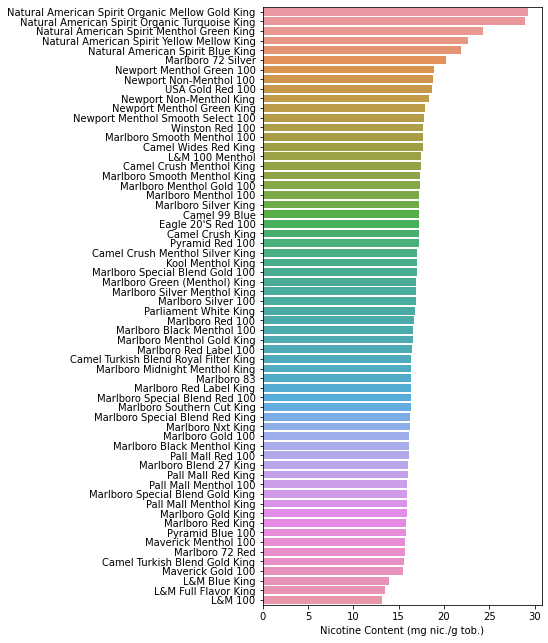

In [185]:


fig, ax = plt.subplots(figsize = (5, 11))
sns.barplot(
    y = 'carmine',
    x = 'carmine_nicotine',
    orient = 'h',
    order = nic_order['carmine'],
    data = df,
    ax = ax
)

plt.ylabel(None)
plt.xlabel('Nicotine Content (mg nic./g tob.)')

plt.savefig("../../figures/nic_content.png", dpi = 200, bbox_inches = 'tight')
plt.show()

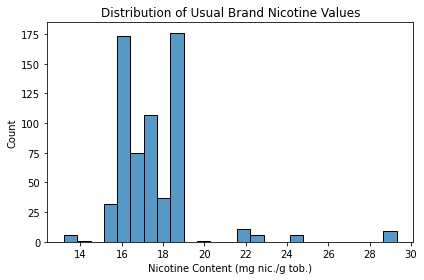

In [186]:
sns.histplot(
    x = 'carmine_nicotine',
    data = df[df['week'] == 'week0']
)

plt.xlabel('Nicotine Content (mg nic./g tob.)')
plt.title('Distribution of Usual Brand Nicotine Values')

plt.tight_layout()
plt.savefig("../../figures/nic_distribution.png", dpi=200)

In [187]:
# participants without UB nicotine values
df['carmine_nicotine'][df['week'] == 'week0'].isna().sum()

135

### Usual Brand "Strength"

I have a sneaking suspicion there's an easier way to add labels to a plot...

In [188]:
strength_order = ['ultra light', 'light', 'regular', 'bold']
strength_counts = df['strength'][df['week'] == 'week0'].value_counts().reset_index()
strength_counts['index'] = pd.Categorical(strength_counts['index'], strength_order)
strength_counts = strength_counts.sort_values("index")
strength_counts['strength'] = 'n = ' + strength_counts['strength'].astype(str)

In [189]:
strength_counts

,index,strength
3,ultra light,n = 8
1,light,n = 94
0,regular,n = 616
2,bold,n = 49


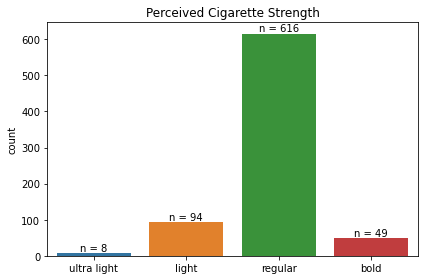

In [190]:


ax = sns.countplot(
    x = 'strength',
    order = strength_order,
    data = df[df['week'] == 'week0']
)

ax.bar_label(container = ax.containers[0], labels = strength_counts['strength'])
plt.title("Perceived Cigarette Strength")
plt.xlabel(None)

plt.tight_layout()
plt.savefig("../../figures/strength_distribution.png", dpi=200)